# Ultimate Pig Basic Strategy Show Down

## Data Context
All data below is looking at the total scores per each game. We simulated a total of 10K games. Each player manages their score, and adds to it at the end of their if they do not roll a 1. Below, you'll find the graphs that support my conclusions. 

The Basic Players:
    - Basic Player - Rolls once and then holds
    - Random Player - 1/6 Chance to hold
    - R6-2 - Roll 'n' times and then hold

## Conclusion
A simple roll and hold strategy appears to be the best basic strategy to play when playing "Ultimate Pig". The 'Basic Game' was a simple roll and hold each turn. I was surpised to see that the random did not do better compared to that of the basic player. 

Looking at [Figure 1](Ultimate-Pig.ipynb#Figure-1), we can see that that the mean of the Basic Player had almost double the average score than the roll twice player. Looking to the [Box Plot](Ultimate-Pig.ipynb#Boxplot), we can see that the winners of the most games being:
- Basic Player
- Roll 3
- Roll 2

Roll 3 appears to have a higher chance of winning a few more games than Roll 2, but their means are pretty close to each other. [Hexbin](Ultimate-Pig.ipynb#Hexbin) shows that as a basic player you'll generally get about 20 points per game.



## Next Steps
- Would like to implement a 'smarter' AI that uses hats and buckets based on previous successes and failures to see how it compares against the basic players. 
- Analyze how 'n' number of dice would affect the game.

#### Figure 1

In [29]:
all_games[['BG_P1', 'Roll2_P1', 'Ran_P1']].describe().rename(columns=
                                                             ({'BG_P1':'Basic Player',
                                                               'Roll2_P1':'Roll Twice Then Hold',
                                                              'Ran_P1': 'Random Chance to Roll or Hold'}))

,Basic Player,Roll Twice Then Hold,Random Chance to Roll or Hold
count,10000.000000,10000.000000,10000.000000
mean,23.269400,13.465400,11.721000
std,5.255986,5.861931,5.757176
min,3.000000,0.000000,0.000000
25%,20.000000,9.000000,8.000000
50%,23.000000,13.000000,11.000000
75%,27.000000,17.000000,15.000000
max,42.000000,34.000000,34.000000


## Boxplot

What is interesting is that the best default strategy is to 

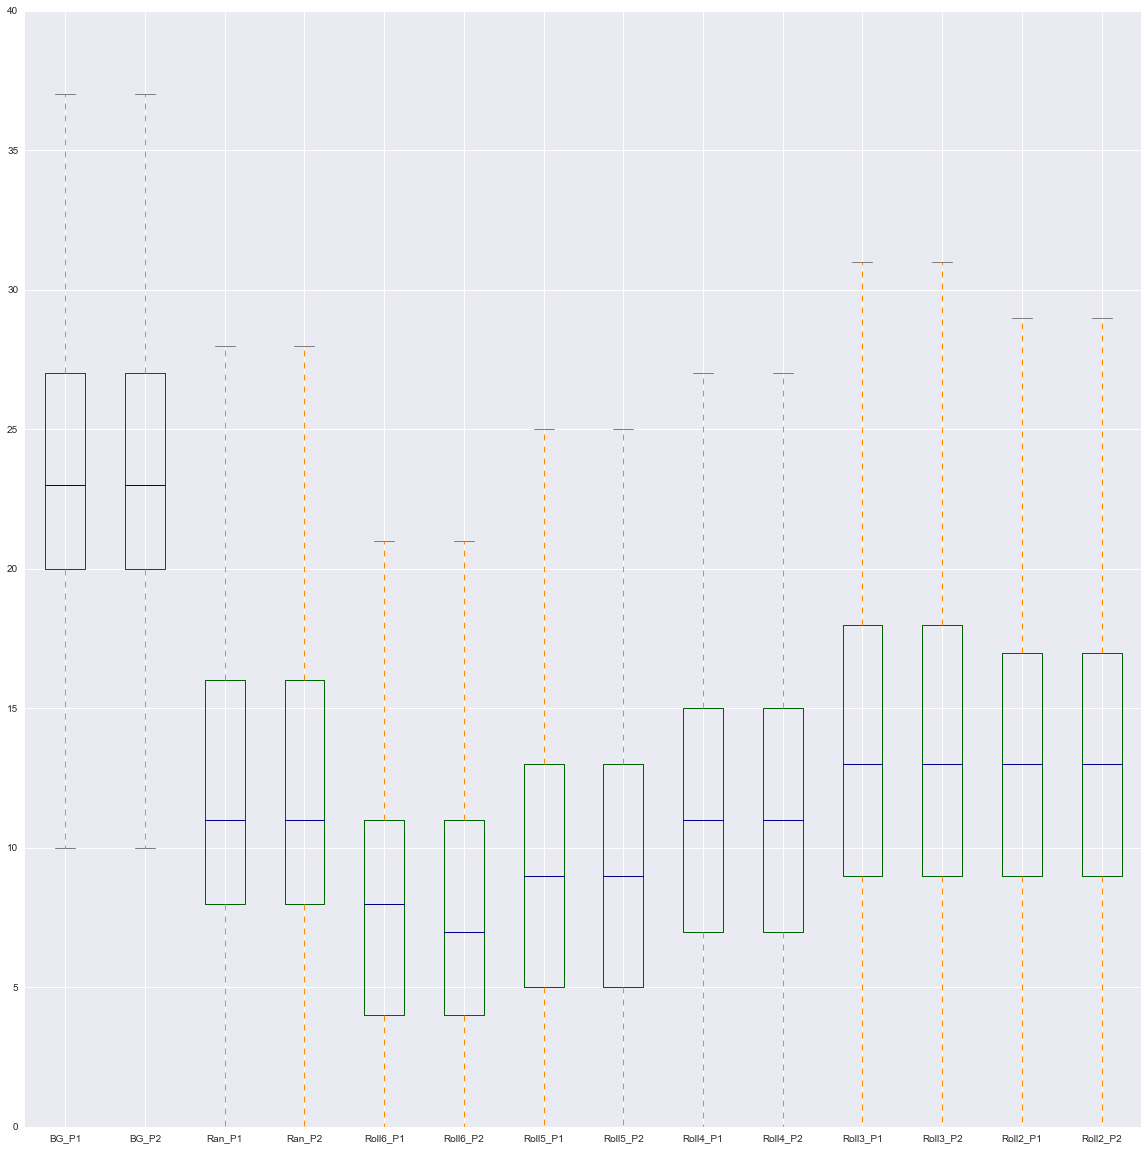

In [13]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
   ....:              medians='DarkBlue', caps='Gray')
all_games.plot(kind='box',figsize=(20,20), color=color, sym='r+')
plt.show()

## Hexbin

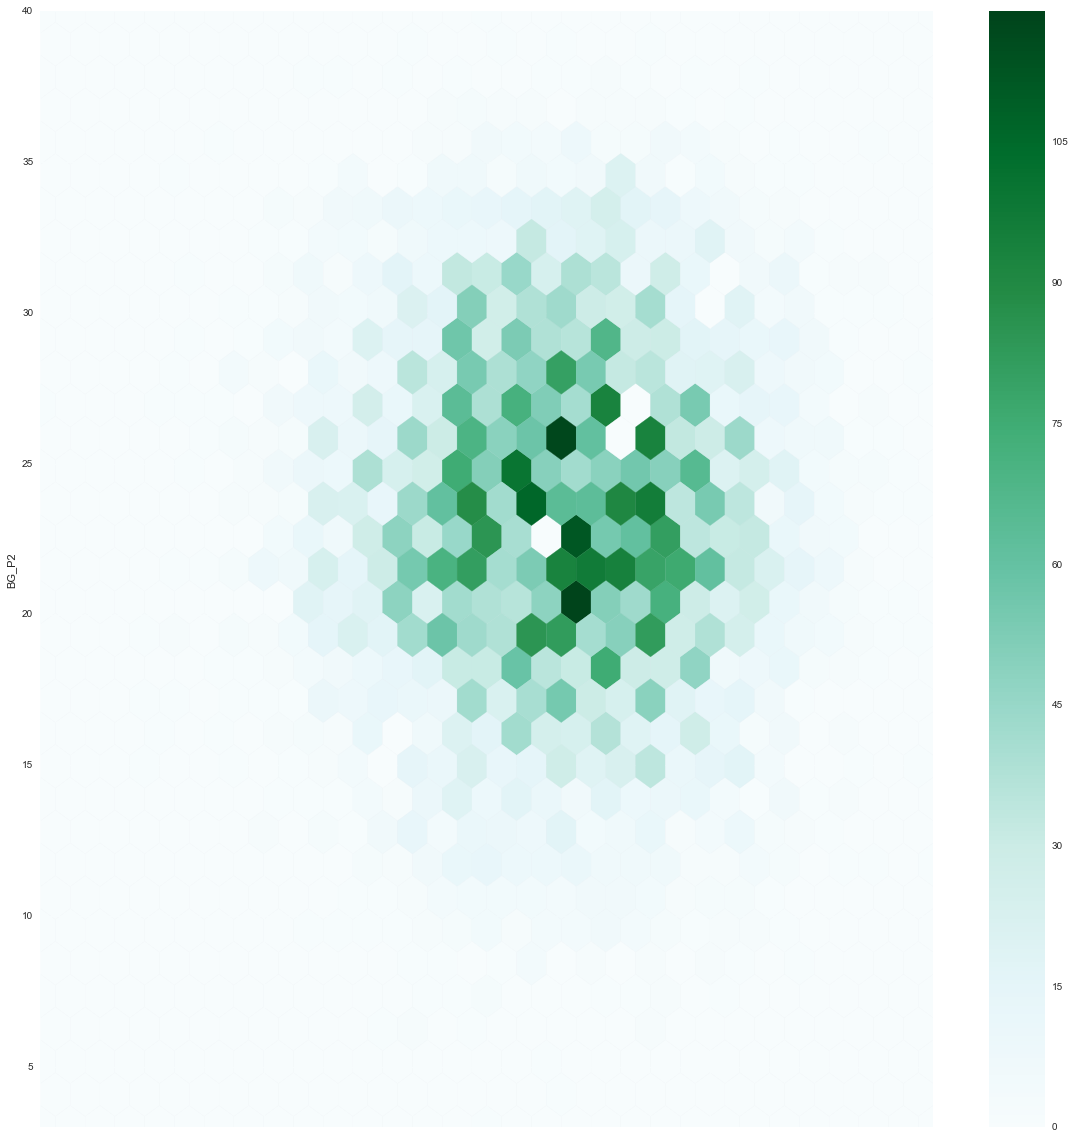

In [41]:
all_games.plot(kind='hexbin', x='BG_P1', y='BG_P2', gridsize=30, figsize=(20,20))
plt.show()

In [ ]:
## Histogram of

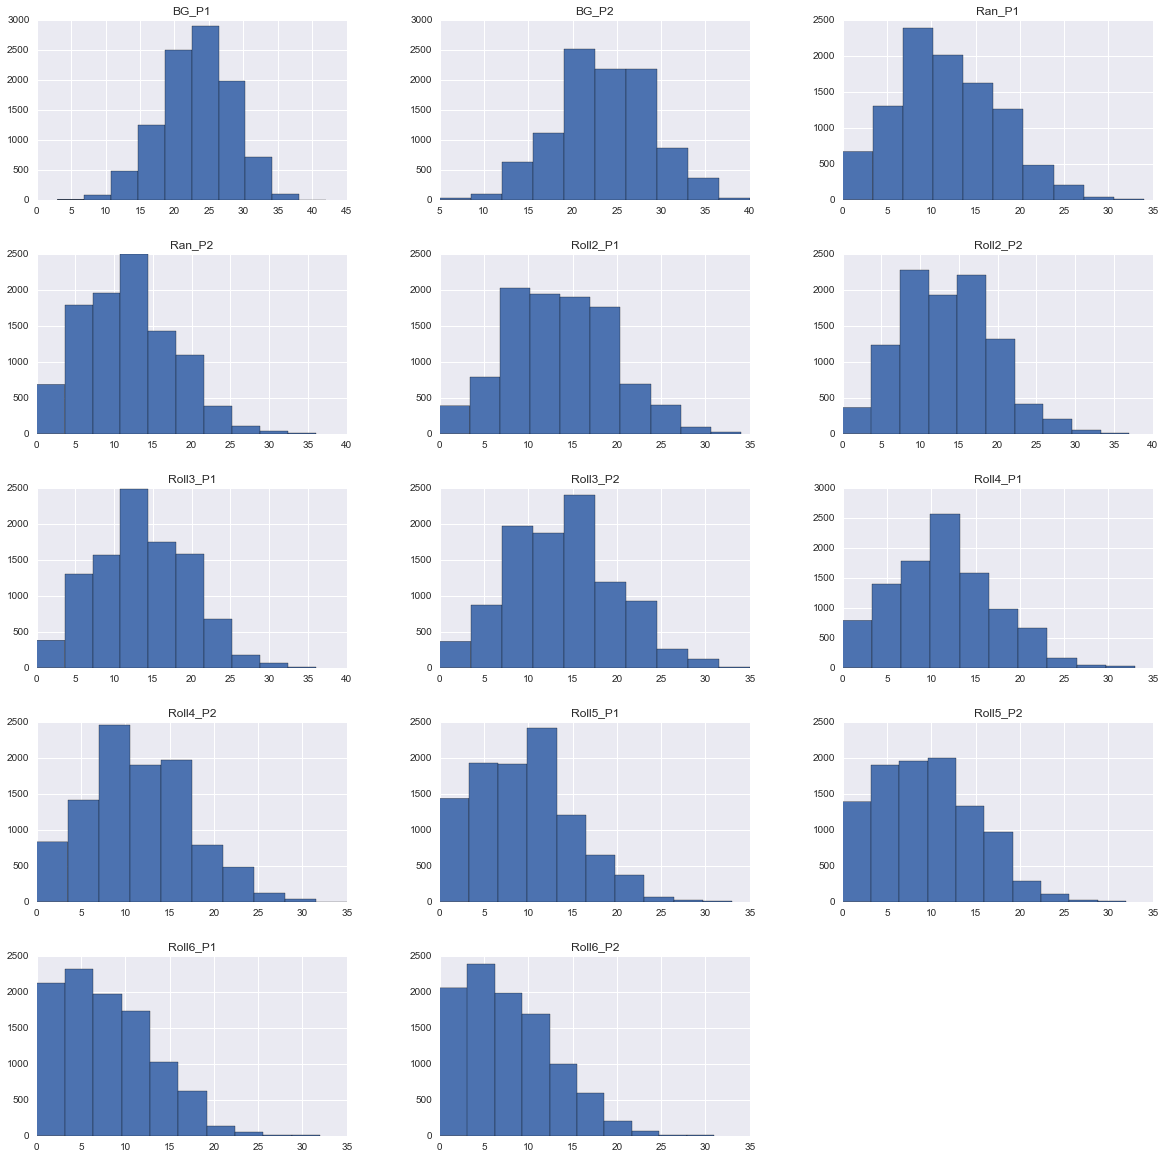

In [9]:
all_games.hist(figsize=(20,20), layout=(5,3))
plt.show()

# Panda Table Set Up

In [3]:
from main import Main
from player import *
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline
import seaborn as sn
from pandas.tools.plotting import andrews_curves, autocorrelation_plot

In [4]:
b_player1 = BasePlayer("Player1")
b_player2 = BasePlayer("Player2")
ran_player1 = RandomThrow("Player1")
ran_player2 = RandomThrow("Player2")
r6_player1 = RollSixThenHold("Player1")
r6_player2 = RollSixThenHold("Player2")
r5_player1 = RollFiveThenHold("Player1")
r5_player2 = RollFiveThenHold("Player2")
r4_player1 = RollFourThenHold("Player1")
r4_player2 = RollFourThenHold("Player2")
r3_player1 = RollThreeThenHold("Player1")
r3_player2 = RollThreeThenHold("Player2")
r2_player1 = RollThreeThenHold("Player1")
r2_player2 = RollThreeThenHold("Player2")

In [5]:
#basic game
a = Main(12000, b_player1, b_player2)
a.main()
#random game
b = Main(12000, ran_player1, ran_player2)
b.main()

# 6-2 rolls
c = Main(12000, r6_player1, r6_player2)
c.main()
d = Main(12000, r5_player1, r5_player2)
d.main()
e = Main(12000, r4_player1, r4_player2)
e.main()
f = Main(12000, r3_player1, r3_player2)
f.main()
g = Main(12000, r2_player1, r2_player2)
g.main()



In [6]:
#Merging simliar games into the same Data Frame
basic_game = pd.merge(Series(b_player1.get_total_score_list()).reset_index().rename(columns = {0:'BG_P1'}), 
                      Series(b_player2.get_total_score_list()).reset_index().rename(columns = {0:'BG_P2'}))

rand_game = pd.merge(Series(ran_player1.get_total_score_list()).reset_index().rename(columns = {0:'Ran_P1'}), 
                      Series(ran_player2.get_total_score_list()).reset_index().rename(columns = {0:'Ran_P2'}))

r6_game = pd.merge(Series(r6_player1.get_total_score_list()).reset_index().rename(columns = {0:'Roll6_P1'}),
                   Series(r6_player2.get_total_score_list()).reset_index().rename(columns = {0:'Roll6_P2'}))

r5_game = pd.merge(Series(r5_player1.get_total_score_list()).reset_index().rename(columns = {0:'Roll5_P1'}),
                   Series(r5_player2.get_total_score_list()).reset_index().rename(columns = {0:'Roll5_P2'}))

r4_game = pd.merge(Series(r4_player1.get_total_score_list()).reset_index().rename(columns = {0:'Roll4_P1'}),
                   Series(r4_player2.get_total_score_list()).reset_index().rename(columns = {0:'Roll4_P2'}))
    
r3_game = pd.merge(Series(r3_player1.get_total_score_list()).reset_index().rename(columns = {0:'Roll3_P1'}),
                        Series(r3_player2.get_total_score_list()).reset_index().rename(columns = {0:'Roll3_P2'}))
    
r2_game = pd.merge(Series(r2_player1.get_total_score_list()).reset_index().rename(columns = {0:'Roll2_P1'}),
                        Series(r2_player2.get_total_score_list()).reset_index().rename(columns = {0:'Roll2_P2'}))


In [7]:
#Merging Games into one main table and cleaning data
all_games = pd.merge(pd.merge(basic_game[:10000], rand_game[:10000]), r6_game[:10000])
all_games = pd.merge(pd.merge(all_games, r5_game[:10000]), r4_game[:10000])
all_games = pd.merge(pd.merge(all_games, r3_game[:10000]), r2_game[:10000])
del all_games['index']